In [28]:
import helpers
import numpy as np
import re 

#helpers.npNicePrint(arr)

data = """RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE"""
#data = """125 17"""
with open("input_12.txt", 'r') as f:
    data = f.read()


def safe_get(grid, index):
    try:
        return grid[tuple(index)]
    except:
        return ""
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]
#data = [
#    [int(match.group(1)), list(map(int, match.group(2).split()))]
#    for line in data.split("\n")
#    if (match := re.match(r'^(\d+):\s*(\d+(?:\s+\d+)*)', line))
#]
#np.prod(sum(data))    
#data = [list(map(int, x.split(" "))) for x in data.split('\n') if not x == ""]
grid = {(x,y): str(val) for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}
#grid
#data = [int(x) for x in data.split(" ")]


{(0, 0): 'L',
 (1, 0): 'L',
 (2, 0): 'L',
 (3, 0): 'L',
 (4, 0): 'L',
 (5, 0): 'L',
 (6, 0): 'L',
 (7, 0): 'L',
 (8, 0): 'F',
 (9, 0): 'F',
 (10, 0): 'F',
 (11, 0): 'F',
 (12, 0): 'F',
 (13, 0): 'F',
 (14, 0): 'F',
 (15, 0): 'F',
 (16, 0): 'F',
 (17, 0): 'F',
 (18, 0): 'F',
 (19, 0): 'F',
 (20, 0): 'F',
 (21, 0): 'F',
 (22, 0): 'I',
 (23, 0): 'I',
 (24, 0): 'I',
 (25, 0): 'I',
 (26, 0): 'I',
 (27, 0): 'I',
 (28, 0): 'I',
 (29, 0): 'I',
 (30, 0): 'V',
 (31, 0): 'V',
 (32, 0): 'V',
 (33, 0): 'Z',
 (34, 0): 'Z',
 (35, 0): 'Z',
 (36, 0): 'Z',
 (37, 0): 'Z',
 (38, 0): 'Z',
 (39, 0): 'E',
 (40, 0): 'E',
 (41, 0): 'E',
 (42, 0): 'E',
 (43, 0): 'E',
 (44, 0): 'E',
 (45, 0): 'E',
 (46, 0): 'E',
 (47, 0): 'E',
 (48, 0): 'E',
 (49, 0): 'E',
 (50, 0): 'E',
 (51, 0): 'N',
 (52, 0): 'N',
 (53, 0): 'K',
 (54, 0): 'A',
 (55, 0): 'A',
 (56, 0): 'K',
 (57, 0): 'K',
 (58, 0): 'R',
 (59, 0): 'R',
 (60, 0): 'R',
 (61, 0): 'R',
 (62, 0): 'R',
 (63, 0): 'R',
 (64, 0): 'R',
 (65, 0): 'R',
 (66, 0): 'P',
 (67,

In [37]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Iterate through the dictionary to add nodes and edges
for coord, val in grid.items():
    # Add the node
    G.add_node(coord, value=grid[coord])
    
    # Check neighbors and add edges
    neighbors = [
        (coord[0] + 1, coord[1]),  # Right
        (coord[0] - 1, coord[1]),  # Left
        (coord[0], coord[1] + 1),  # Up
        (coord[0], coord[1] - 1),  # Down
    ]
    for neighbor in neighbors:
        if neighbor in grid:
            if grid[neighbor] == val:
                G.add_edge(coord, neighbor)

# Visualize or analyze the graph
#print("Nodes:", G.nodes(data=True))
#print("Edges:", G.edges(data=True))

# If you want, you can draw the graph using matplotlib
#import matplotlib.pyplot as plt
#pos = {node: node for node in G.nodes()}  # Use coordinates as positions
#nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold')
#plt.show()

In [38]:
def integer_perimeter_nodes(grid_points):
    perimeter_nodes = set()
    # Define possible directions for neighbors
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1,1), (-1,-1), (1,-1), (-1,1)]  # Up, Right, Down, Left
    perimeter = 0
    
    scaled_points = set()
    for x, y in grid_points: #by making it 3x larger we avoid overlapping edges 
        for dx in range(3):
            for dy in range(3):
                scaled_points.add((3*x + dx, 3*y + dy))

    scaled_points = list(scaled_points)

    for x, y in scaled_points:
        for dx, dy in directions:
            neighbor = (x + dx, y + dy)
            # If neighbor is not in the grid, it's a boundary edge
            if neighbor not in scaled_points:
                perimeter_nodes.add(neighbor)
    return perimeter_nodes

Nodes: [(7, 3), (8, 3), (6, 3), (6, 9), (7, 9), (5, 9), (11, 11), (12, 11), (10, 11), (-1, 0), (-1, 1), (-1, -1), (15, 1), (15, 2), (15, 0), (8, 5), (9, 5), (7, 5), (5, 5), (6, 5), (4, 5), (11, 5), (12, 5), (10, 5), (-1, 14), (-1, 15), (-1, 13), (15, 11), (14, 11), (15, 12), (8, 15), (9, 15), (7, 15), (5, 11), (6, 11), (4, 11), (3, 5), (9, 3), (10, 3), (-1, 11), (-1, 12), (-1, 10), (14, 15), (15, 15), (13, 15), (13, 11), (15, 14), (15, 13), (4, 15), (5, 15), (3, 15), (9, 9), (10, 9), (8, 9), (6, -1), (7, -1), (5, -1), (11, 15), (12, 15), (10, 15), (-1, 4), (-1, 5), (-1, 3), (3, 11), (3, 10), (1, 15), (2, 15), (0, 15), (8, -1), (11, 3), (4, -1), (3, -1), (-1, 2), (6, 15), (14, 5), (15, 5), (13, 5), (13, 3), (14, 3), (12, 3), (15, -1), (0, -1), (11, 9), (7, 11), (12, 9), (2, -1), (1, -1), (15, 7), (15, 8), (15, 6), (3, 4), (-1, 8), (-1, 9), (-1, 7), (15, 9), (14, 9), (15, 3), (13, 9), (-1, 6), (8, 11), (14, -1), (13, -1), (3, 9), (9, 11), (4, 9), (12, -1), (11, -1), (5, 3), (4, 3), (3, 3

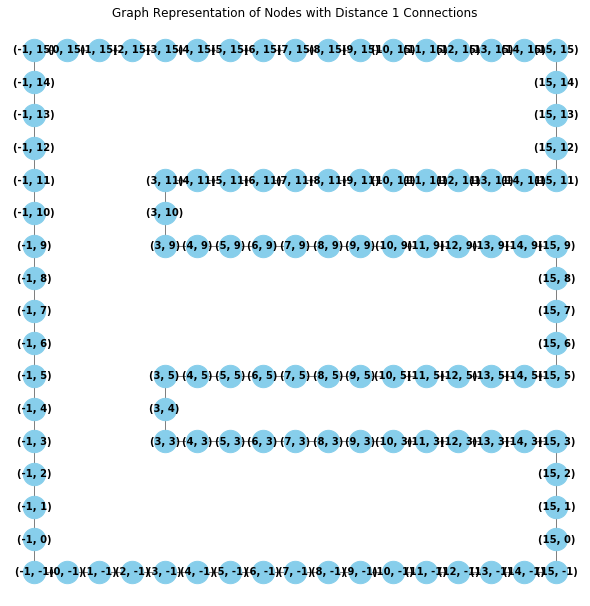

In [36]:
import matplotlib.pyplot as plt
#This is an example where we need to increase the size of the shape by 3x in order to get the correct perimeter
#if you keep it the same or only double the size then the nodes will connect and the continous edges counter will not work
perimeter_nodes = integer_perimeter_nodes([(0, 0), (1, 0), (0, 1), (2, 0), (3, 0), (4, 0), (0, 2), (1, 2), (0, 3), (2, 2), (3, 2), (4, 2), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)])

# Create a graph
G_test = nx.Graph()

# Iterate through the dictionary to add nodes and edges
for coord in perimeter_nodes:
    # Add the node
    G_test.add_node(coord)
    
    # Check neighbors and add edges
    neighbors = [
        (coord[0] + 1, coord[1]),  # Right
        (coord[0] - 1, coord[1]),  # Left
        (coord[0], coord[1] + 1),  # Up
        (coord[0], coord[1] - 1),  # Down
        
        #(coord[0] + 1, coord[1] +1),  # Right
        #(coord[0] - 1, coord[1] +1),  # Left
        #(coord[0] +1, coord[1] - 1),  # Up
        #(coord[0] - 1, coord[1] - 1),  # Down
    ]
    for neighbor in neighbors:
        if neighbor in perimeter_nodes:
                G_test.add_edge(coord, neighbor)

# Visualize or analyze the graph
print("Nodes:", G_test.nodes())
print("Edges:", G_test.edges())

print(len(list(nx.connected_components(G_test))))

# Plot the graph
plt.figure(figsize=(8, 8))
pos = {node: node for node in G_test.nodes()}  # Position nodes by their coordinate values
nx.draw(G_test, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Representation of Nodes with Distance 1 Connections")
plt.show()

In [39]:
import networkx as nx

# List of edges in the form (node1, node2, {})
from collections import defaultdict

def find_straight_lines(G):
    # Store nodes by their coordinates (x, y)
    nodes_by_x = defaultdict(set)
    nodes_by_y = defaultdict(set)

    # Populate the dictionaries
    for node in G.nodes:
        x, y = node  # Assuming nodes have 'coord' attribute with (x, y)
        nodes_by_x[x].add(y)
        nodes_by_y[y].add(x)
    
    horizontal_lines = 0
    vertical_lines = 0
    
    # Check horizontal lines
    for y in nodes_by_y:
        sorted_xs = sorted(nodes_by_y[y])
        # Look for consecutive x values with distance 1
        count = 1  # At least one node is a valid starting point
        for i in range(1, len(sorted_xs)):
            if sorted_xs[i] == sorted_xs[i-1] + 1:
                count += 1
            else:
                if count > 1:
                    horizontal_lines += 1
                count = 1  # Reset for the next sequence
        if count > 1:
            horizontal_lines += 1  # For the last sequence
    
    # Check vertical lines
    for x in nodes_by_x:
        sorted_ys = sorted(nodes_by_x[x])
        # Look for consecutive y values with distance 1
        count = 1  # At least one node is a valid starting point
        for i in range(1, len(sorted_ys)):
            if sorted_ys[i] == sorted_ys[i-1] + 1:
                count += 1
            else:
                if count > 1:
                    vertical_lines += 1
                count = 1  # Reset for the next sequence
        if count > 1:
            vertical_lines += 1  # For the last sequence
    
    return horizontal_lines + vertical_lines

# Extract continuous straight edges
#horizontal_groups, vertical_groups = find_straight_lines(G)
#print(horizontal_groups, vertical_groups)

# Display the result
#print("Horizontal continuous sections:")
#for group in horizontal_groups:
#    print(group)

#print("\nVertical continuous sections:")
#for group in vertical_groups:
#    print(group)

In [40]:

def get_perimeter_graph(orig_nodes):
    perimeter_nodes = integer_perimeter_nodes(orig_nodes)

    # Create a graph
    G_per = nx.Graph()

    # Iterate through the dictionary to add nodes and edges
    for coord in perimeter_nodes:
        # Add the node
        G_per.add_node(coord)

        # Check neighbors and add edges
        neighbors = [
            (coord[0] + 1, coord[1]),  # Right
            (coord[0] - 1, coord[1]),  # Left
            (coord[0], coord[1] + 1),  # Up
            (coord[0], coord[1] - 1),  # Down

            #(coord[0] + 1, coord[1] +1),  # Right
            #(coord[0] - 1, coord[1] +1),  # Left
            #(coord[0] +1, coord[1] - 1),  # Up
            #(coord[0] - 1, coord[1] - 1),  # Down
        ]
        for neighbor in neighbors:
            if neighbor in perimeter_nodes:
                    G_per.add_edge(coord, neighbor)
    return G_per

    # Visualize or analyze the graph
    #print("Nodes:", G.nodes())
    #print("Edges:", G.edges())

    #print(len(list(nx.connected_components(G))))

In [41]:
ans = 0
# Find connected components
components = list(nx.connected_components(G))

# Iterate over the components
#for i, component in enumerate(components, start=1):
#    print(f"Component {i}: {component}")

# Optional: Create subgraphs for each component
subgraphs = [G.subgraph(component) for component in components]
for i, subgraph in enumerate(subgraphs, start=1):
    #print(f"Subgraph {i} nodes: {list(subgraph.nodes())}")
    #print(len(list(subgraph.nodes())), find_straight_lines(get_perimeter_graph(subgraph)))
    ans += len(list(subgraph.nodes())) * find_straight_lines(get_perimeter_graph(subgraph))
ans

815788